# Data Science Project: Answering Business Questions Using Python

### Merging the Data

#### Since all of the data is in seperate files based on monthly sales we need to merge into one file to perform any type of analysis.

In [5]:
import pandas as pd
import os


In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir("./Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv", index = False)

all_data = pd.read_csv("all_data.csv")
all_data.head()


NameError: name 'pd' is not defined

In [4]:
# adding month column
all_data['Month']= all_data['Order Date'].str[0:2]
#all_data['Month'] = all_data['Month'].astype('int32')-- error meaning there is a non str value somewhere in the data
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


## Cleaning the data
Before we go into any exploration of the data it is crucial to clean the data for mistakes and inconsistances.


In [6]:
# dropping the rows if NAN

In [7]:
# displaying the nan values from the pandas data frame
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#dropping these from the all data 
all_data = all_data.dropna(how = "all")
#all_data['Month'] = all_data['Month'].astype('int32') -- leads to a "or" error

In [9]:
#finding the "or" error
temp_df = all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [10]:
#remove the 'Or'
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


## Question One: What Month Had the Best Sales?

In [11]:
# Making a sales column to find what month had the best sales of the month
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [12]:
#Monthly Sales
pd.options.display.float_format = '{:,.2f}'.format # sets the format with commas for readability
all_data.groupby("Month").sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,"1,811,768.38",01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...","1,822,256.73"
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,"2,188,884.72",02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...","2,202,022.42"
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,"2,791,207.83",03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...","2,807,100.38"
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,"3,367,671.02",04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...","3,390,670.24"
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,"3,135,125.13",05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...","3,152,606.75"
6,1957481958691960721961321966381966391976981990...,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253,"2,562,025.61",06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...,"856 Elm St, San Francisco, CA 94016877 Center ...","2,577,802.26"
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,"2,632,539.56",07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...","2,647,775.76"
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,"2,230,345.42",08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...","2,244,467.88"
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,"2,084,992.09",09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...","2,097,560.13"


### Ploting the Data

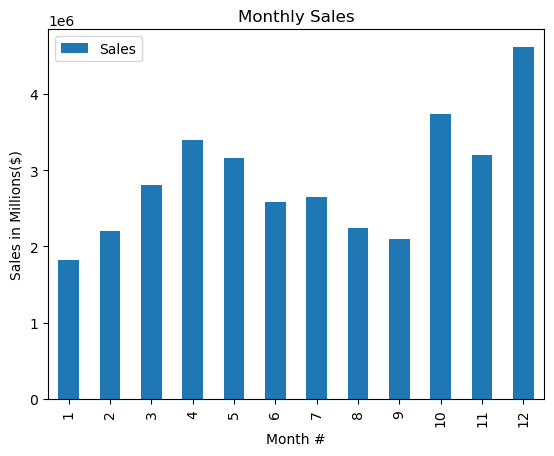

In [13]:
import matplotlib.pyplot as plt
monthly_sales = all_data.groupby("Month").sum().reset_index() # when using the group by the index is changed so it is required to use reset index to plot the column
monthly_sales.plot(x = "Month", y = "Sales", kind = "bar")
plt.ylabel("Sales in Millions($)")
plt.xlabel("Month #")
plt.title("Monthly Sales")
plt.show()



# Question Two: What City had the Best Sales?
Using the address column, we can make some functions that split the data for the city and state to then analyze which were the best.

In [14]:
def get_city(addy):
    return addy.split(",")[1]
def get_state(addy):
    return addy.split(",")[2].split(' ')[1]
all_data["City"] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,"1,700.00",12/30/19 00:01,"136 Church St, New York City, NY 10001",12,"1,700.00",New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [15]:
city = all_data.groupby("City").sum().reset_index()
display(city)

,City,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,Atlanta (GA),2956692956932957102957372957372957562957602957...,USB-C Charging CableWired HeadphonesAAA Batter...,16602,"2,779,908.20",12/18/19 12:3812/16/19 16:4012/26/19 19:0912/1...,"43 Hill St, Atlanta, GA 30301856 12th St, Atla...",104794,"2,795,498.58"
1,Austin (TX),2956802957022957032957032957542957892957982958...,Lightning Charging CableWired HeadphonesAA Bat...,11153,"1,809,873.61",12/01/19 14:3012/21/19 18:5012/17/19 12:2712/1...,"338 Main St, Austin, TX 73301628 River St, Aus...",69829,"1,819,581.75"
2,Boston (MA),2956772956812956812956812956812956872956952957...,AA Batteries (4-pack)Google PhoneUSB-C Chargin...,22528,"3,637,409.77",12/20/19 19:1912/25/19 12:3712/25/19 12:3712/2...,"866 Pine St, Boston, MA 0221579 Elm St, Boston...",141112,"3,661,642.01"
3,Dallas (TX),2956722956732956742956782956792956942957242957...,USB-C Charging CableBose SoundSport Headphones...,16730,"2,752,627.82",12/13/19 09:2912/15/19 23:2612/28/19 11:5112/0...,"813 Hickory St, Dallas, TX 75001718 Wilson St,...",104620,"2,767,975.40"
4,Los Angeles (CA),2956762956882956912956922957062957142957162957...,ThinkPad LaptopApple Airpods HeadphonesBose So...,33289,"5,421,435.23",12/28/19 17:1912/08/19 11:2112/22/19 18:3412/1...,"410 Lincoln St, Los Angeles, CA 90001546 Park ...",208325,"5,452,570.80"
5,New York City (NY),2956652956662956672956702956982956982957002957...,Macbook Pro LaptopLG Washing MachineUSB-C Char...,27932,"4,635,370.83",12/30/19 00:0112/29/19 07:0312/12/19 18:2112/3...,"136 Church St, New York City, NY 10001562 2nd ...",175741,"4,664,317.43"
6,Portland (ME),2956862957972958622960182961272961582962062962...,USB-C Charging CableWired HeadphonesAAA Batter...,2750,"447,189.25",12/17/19 16:1012/16/19 09:2312/03/19 14:2212/2...,"573 Maple St, Portland, ME 04101163 Washington...",17144,"449,758.27"
7,Portland (OR),2956712956822957342957572958192958572958922958...,USB-C Charging CableUSB-C Charging CableAAA Ba...,11303,"1,860,558.22",12/16/19 15:1012/23/19 19:2512/25/19 12:3812/0...,"928 12th St, Portland, OR 97035780 Elm St, Por...",70621,"1,870,732.34"
8,San Francisco (CA),2956682956752956832956842956852956892956962956...,27in FHD MonitorUSB-C Charging CableWired Head...,50239,"8,211,461.74",12/22/19 15:1312/13/19 13:5212/23/19 22:4612/0...,"410 6th St, San Francisco, CA 94016594 1st St,...",315520,"8,262,203.91"
9,Seattle (WA),2956902956992957152957212957652957662957842957...,Apple Airpods HeadphonesAA Batteries (4-pack)U...,16553,"2,733,296.01",12/04/19 00:4412/17/19 18:3212/17/19 18:2012/0...,"174 Cedar St, Seattle, WA 98101162 Maple St, S...",104941,"2,747,755.48"


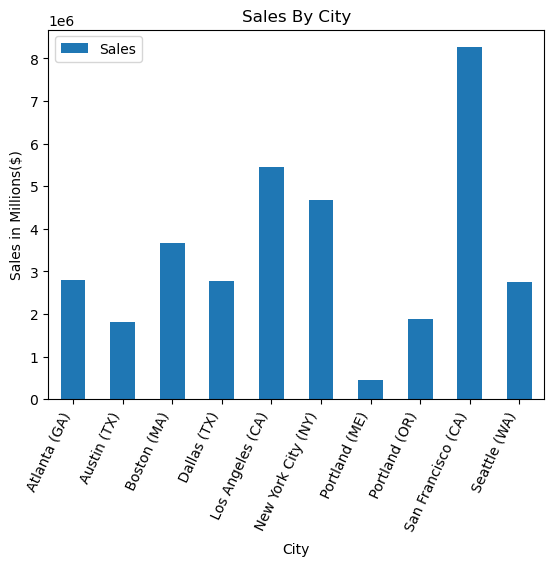

In [30]:
city.plot(x = "City", y = "Sales", kind = "bar")
plt.xlabel("City")
plt.ylabel("Sales in Millions($)")
plt.title("Sales By City")
plt.xticks(rotation = 65, ha = 'right')
plt.show()



# Question 3: What time Should we display the advertisments to maximize likelyhood of purchase?

In [17]:
type(all_data['Order Date'][1])#indicates that the orderdate is in str so lets convert to date/time
all_data["Order Date"] = pd.to_datetime(all_data['Order Date'])
#Making an Hour and minute column 
all_data["Hour"]= all_data['Order Date'].dt.hour
all_data["Minute"]= all_data['Order Date'].dt.minute
all_data.head()

/var/folders/nn/9kz8gxh905dddp63xswjzyn40000gn/T/ipykernel_13212/1699553447.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,"1,700.00",2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,"1,700.00",New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


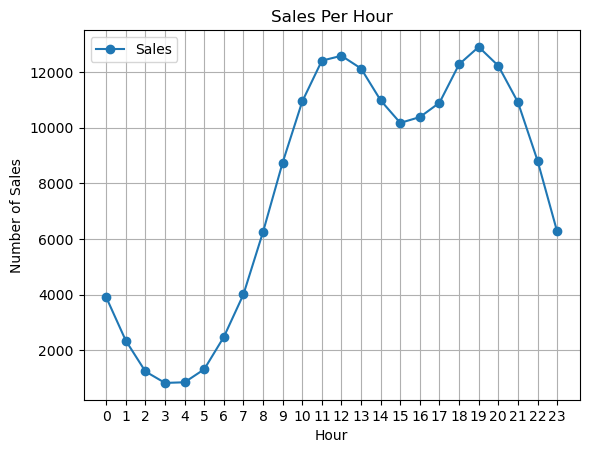

In [28]:
sales_per_hour = all_data.groupby(['Hour']).count().reset_index()# counts the number of sales occuring each hour
sales_per_hour.plot(x ='Hour', y ='Sales', kind ='line', marker='o')
plt.grid()
plt.xticks(sales_per_hour['Hour'])
plt.ylabel("Number of Sales")
plt.title("Sales Per Hour")
plt.show()





#### Chart indicates that sales peak around 11 am and 7 pm (hr 19) so targeting the ads during these frequent shopping hours could be a big help in increaseing sales.

# Question 4: What products are often sold together?

In [19]:
pd.set_option('display.max_rows',100)
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,"1,700.00",2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,"1,700.00",New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City (NY),22,58
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland (OR),15,10
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas (TX),9,29
8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas (TX),23,26
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas (TX),11,51


#### Lets find where the Ids are duplicated to understand what products are being purchased in one order(one order ID).

In [20]:

id_df = all_data[all_data["Order ID"].duplicated(keep = False)]
#join the products with the same id into one cell
id = id_df.copy() # making a copy to avoid the settting with copy warning
id["Grouped"] = id.groupby("Order ID")["Product"].transform(lambda x:",".join(x))
#getting rid of the duplicates
id_df = id[['Order ID', "Grouped"]].drop_duplicates()
pd.set_option("display.max_colwidth",100)
id_df.head(50)
grouped_mode = id["Grouped"].mode()
print(grouped_mode)# indicates the most common paired purchased 

0    iPhone,Lightning Charging Cable
Name: Grouped, dtype: object


#### After creating a data frame with the duplicated IDs we can quickly use the mode method to see that the most common pair of purchase is the iphone with the lightning cable. The code below will let us see more of the most commonly paired purchases.

In [21]:
#iterrating through the rows to find which pair shows up how often and the top few commonly purcahsed pairs 
from itertools import combinations
from collections import Counter
count = Counter()
for row in id_df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)  

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Above we can see the top 10 frequently bought together items, with their purchase frequency. After finding these values, we can graph them below to clearly visualize the pairs of products and get a better understanding of what is being sold. After uncovering this information, we can now develop selling strategies or marketing materials accordingly.

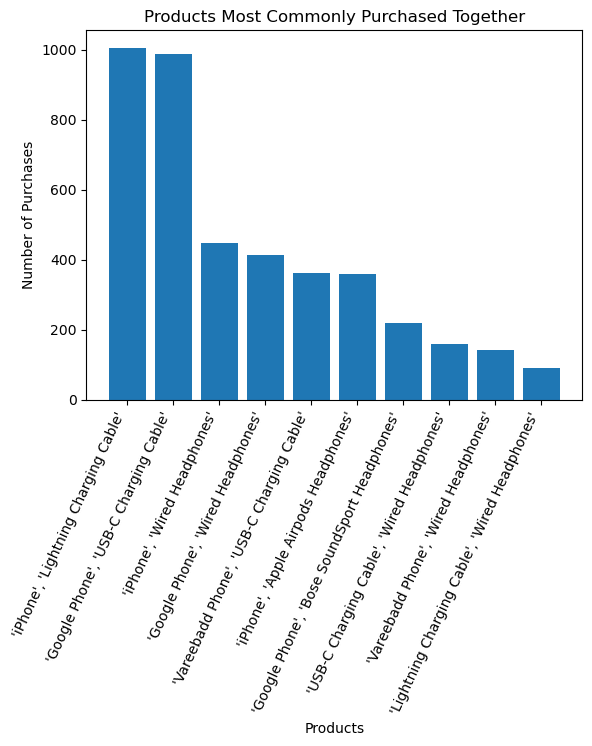

In [27]:
# Graphing the Most Common Pairs
import re
data = {}
for key, value in count.most_common(10):
    data[key] = value
pairs = pd.DataFrame.from_dict(data, orient='index', columns=['Count'])
pairs = pairs.reset_index()
pairs.columns = ['Items', "Purchase Freq"]
pairs['Items'] = pairs['Items'].astype(str).apply(lambda x: re.sub(r'\(|\)', '', x))

plt.bar(pairs['Items'], pairs['Purchase Freq'])
plt.ylabel("Number of Purchases")
plt.xlabel("Products")
plt.title("Products Most Commonly Purchased Together")
plt.xticks(rotation = 65, ha = 'right', size = 10)
plt.show()








# Question 5) What Product sold the most and why ?

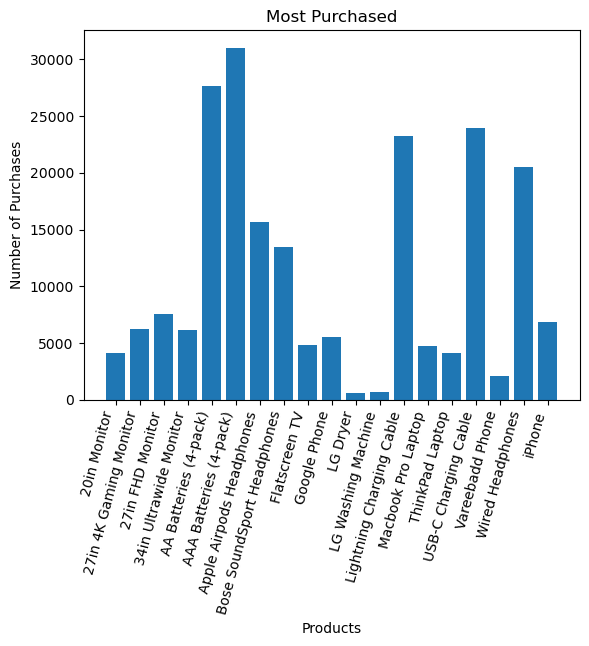

In [24]:
product_group = all_data.groupby('Product').sum("Quantity Ordered").reset_index()
product_group
plt.bar(product_group['Product'], product_group['Quantity Ordered'])
plt.ylabel("Number of Purchases")
plt.xlabel("Products")
plt.title("Most Purchased")
plt.xticks(rotation = 75, ha = "right", size = 10)
plt.show()



/var/folders/nn/9kz8gxh905dddp63xswjzyn40000gn/T/ipykernel_13212/3540858917.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_group["Product"], rotation = 'vertical', size=8)


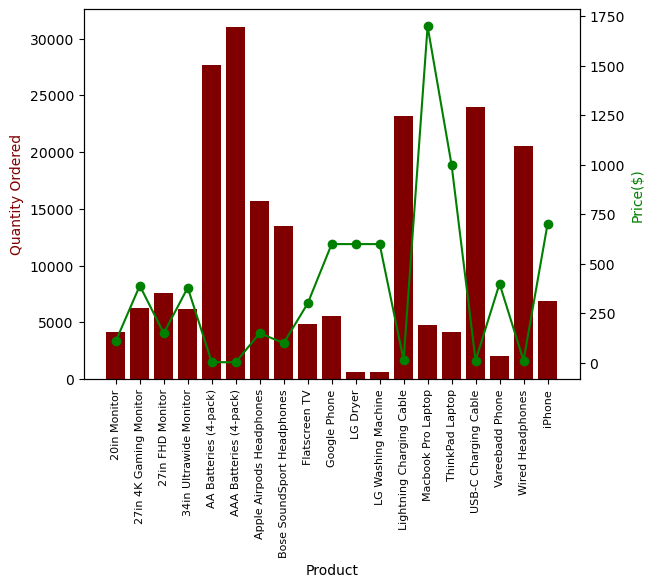

In [26]:
prices = all_data.groupby('Product').mean('Price Each')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product_group['Product'],product_group["Quantity Ordered"], color = "maroon")
ax2.plot(product_group['Product'],prices["Price Each"],color = 'green', marker = "o")
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color = "maroon")
ax2.set_ylabel('Price($)', color = 'green')
ax1.set_xticklabels(product_group["Product"], rotation = 'vertical', size=8)
plt.show()







#### Based on the two merged graphs above, we can see that the most purchased items are often the more affordable items. The exceptions are the technological items like phones and laptops that most likely don't follow this trend because of a higher demand for these products. This can be due to tech becoming outdated; for example, items like phones are being released yearly. Other products like laptops have a high demand in consumer groups like students and professionals, requiring individuals to purchase their own laptop, which is not the case for items like dryers and washers, which are one per family.